<a href="https://colab.research.google.com/github/tfreyd/TensorflowCoursera/blob/main/C4/W4/ungraded_labs/C4_W4_Lab_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
import matplotlib.pyplot as plt

2.6.0


In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [3]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [32]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [5]:
tf.keras.backend.clear_session() 
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30 
train_set = windowed_dataset ( x_train, window_size, batch_size=128, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential ([
  tf.keras.layers.Conv1D(32, kernel_size=5,strides=1, padding = 'causal',activation='relu',input_shape=[None,1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x : x * 200)                     
])


#setting up the callback to find the best learning rate 
lr_schedule = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-8 * 10**(epoch/20))

optimizer  = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum= 0.9)

model.compile(loss=tf.keras.losses.Huber(),
optimizer = optimizer, metrics=['mae'])

history= model.fit(train_set, epochs = 100, callbacks = [lr_schedule])

Epoch 1/100
8/8 [==============================] - 21s 18ms/step - loss: 34.0438 - mae: 34.5416
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 33.0697 - mae: 33.5672
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 31.4026 - mae: 31.8998
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 29.2024 - mae: 29.6995
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 26.4395 - mae: 26.9352
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 23.2858 - mae: 23.7805
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 20.0954 - mae: 20.5887
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 17.4126 - mae: 17.9056
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 15.5792 - mae: 16.0712
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 14.5424 - mae: 15.0343
Epoch 11/100
8/8 [==============================

In [6]:
type(history)

keras.callbacks.History

In [7]:
history.history.items()

dict_items([('loss', [34.043758392333984, 33.06971740722656, 31.402559280395508, 29.202438354492188, 26.43948745727539, 23.28584861755371, 20.095441818237305, 17.4125919342041, 15.57919692993164, 14.542366027832031, 14.071036338806152, 13.842235565185547, 13.677248001098633, 13.530871391296387, 13.382609367370605, 13.226524353027344, 13.053573608398438, 12.86333179473877, 12.652050971984863, 12.40989875793457, 12.136545181274414, 11.832663536071777, 11.497617721557617, 11.152894020080566, 10.803009986877441, 10.46452522277832, 10.131229400634766, 9.825437545776367, 9.536154747009277, 9.284920692443848, 9.07387638092041, 8.897534370422363, 8.742653846740723, 8.59851360321045, 8.452000617980957, 8.30491828918457, 8.1552095413208, 7.999436378479004, 7.840369701385498, 7.68049430847168, 7.522470951080322, 7.367245197296143, 7.225010871887207, 7.092428684234619, 6.953491687774658, 6.82499885559082, 6.7005534172058105, 6.564026355743408, 6.441644191741943, 6.283385276794434, 6.12713527679443

In [8]:
learnig_rate=history.history['lr']
loss_values=history.history['loss']

(1e-08, 0.0001, 0.0, 30.0)

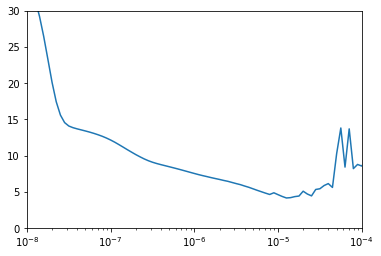

In [9]:
plt.semilogx(learnig_rate,loss_values)
plt.axis([1e-8,1e-4,0,30])

The best learning rate is 10e-5.

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
batch_size= 16
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32,kernel_size=3,
                         strides=1, padding='causal',
                         activation='relu',input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer= tf.keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)

model.compile(loss='Huber',
              optimizer=optimizer,
              metrics=['mae'])
history= model.fit(dataset, epochs=500)

Epoch 1/500
61/61 [==============================] - 3s 6ms/step - loss: 20.3571 - mae: 20.8493
Epoch 2/500
61/61 [==============================] - 1s 7ms/step - loss: 5.8200 - mae: 6.3013
Epoch 3/500
61/61 [==============================] - 0s 7ms/step - loss: 5.3761 - mae: 5.8560
Epoch 4/500
61/61 [==============================] - 0s 6ms/step - loss: 5.2301 - mae: 5.7098
Epoch 5/500
61/61 [==============================] - 0s 7ms/step - loss: 5.1190 - mae: 5.5978
Epoch 6/500
61/61 [==============================] - 0s 6ms/step - loss: 4.9412 - mae: 5.4197
Epoch 7/500
61/61 [==============================] - 0s 6ms/step - loss: 4.8450 - mae: 5.3235
Epoch 8/500
61/61 [==============================] - 1s 7ms/step - loss: 4.7798 - mae: 5.2573
Epoch 9/500
61/61 [==============================] - 0s 6ms/step - loss: 4.8194 - mae: 5.2970
Epoch 10/500
61/61 [==============================] - 0s 6ms/step - loss: 4.7166 - mae: 5.1943
Epoch 11/500
61/61 [==============================] - 1s 

In [37]:
#forecasting
rnn_forecast = model_forecast(model, series[...,np.newaxis],window_size)
rnn_forecast = rnn_forecast[split_time - window_size: -1, -1, 0]

In [38]:
rnn_forecast.shape

(461,)

In [40]:
#how good is the forecasting
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5.5925856

<Figure size 432x288 with 0 Axes>

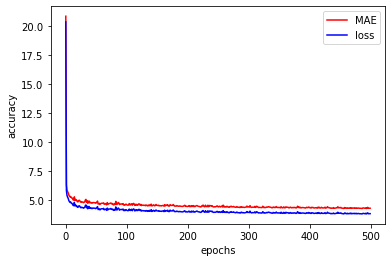

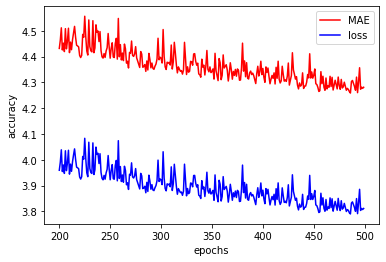

<Figure size 432x288 with 0 Axes>

In [48]:
#plotting the diverse variable
mae = history.history['mae']
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs,mae, 'r')
plt.plot( epochs,loss, 'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['MAE','loss'])
plt.figure()

#we zoom 

epochs_zoom= epochs[200:]
mae_zoom=mae[200:]
loss_zoom=loss[200:]


plt.plot(epochs_zoom,mae_zoom, color='r')
plt.plot(epochs_zoom, loss_zoom, color='b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['MAE','loss'])
plt.figure()